In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *

In [2]:
shop = pd.read_csv('./data/shop_2022_seoul.csv')
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


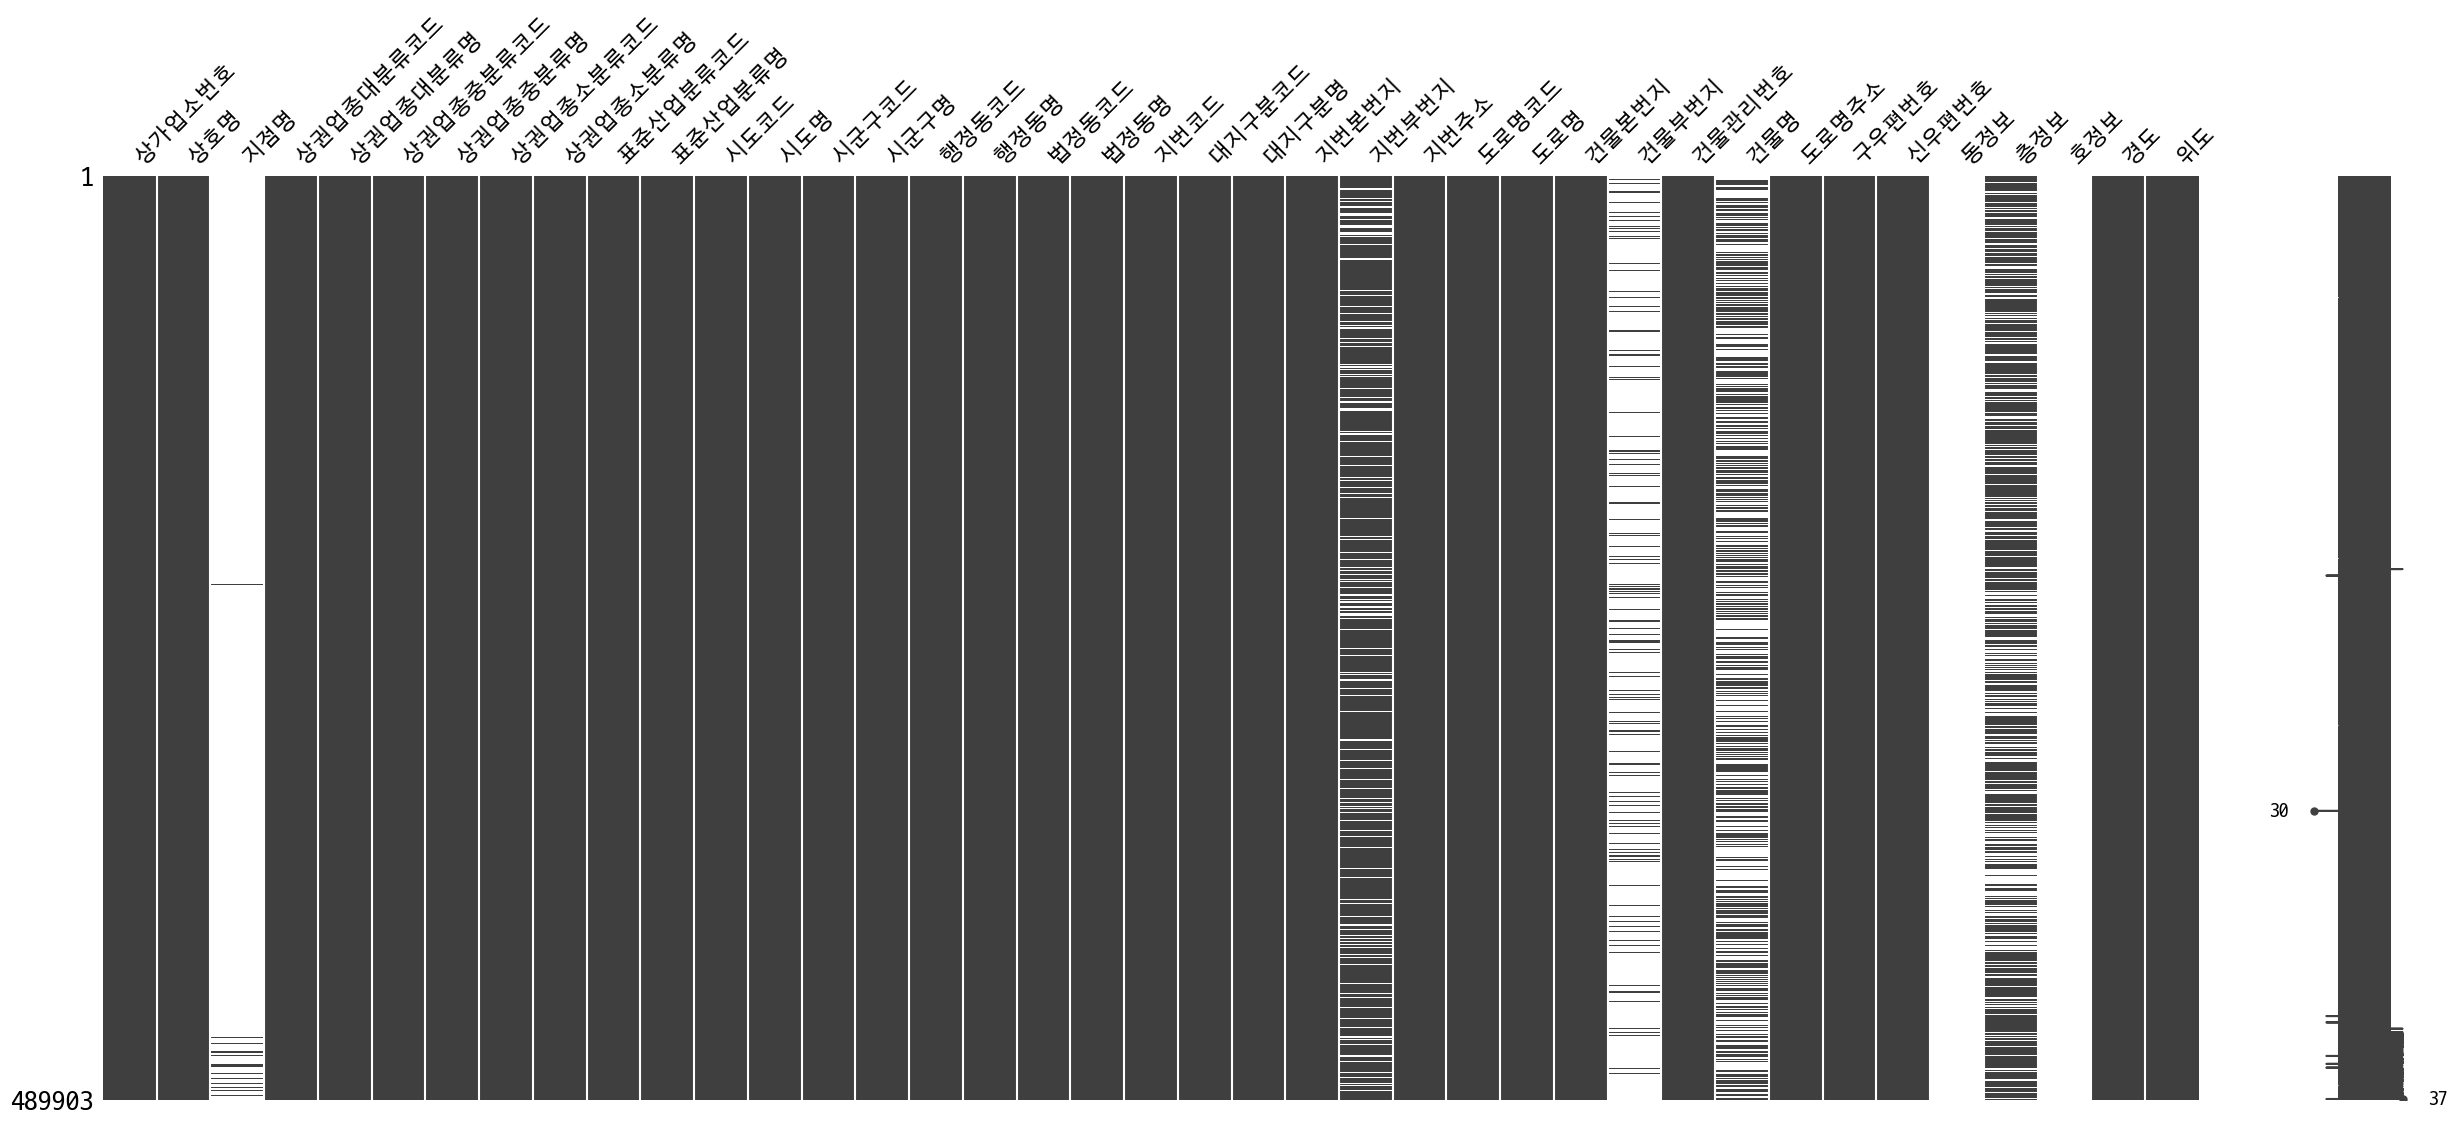

In [3]:
# 주요 결측치 확인
msno.matrix(shop , figsize=(30, 12))
plt.show()

In [4]:
value_columns = ['상권업종대분류명', '상권업종중분류명',  '상권업종소분류명',  '시도명', '시군구명', 
                 '행정동명','법정동명', '지번주소', '도로명주소',  '경도', '위도']
shop_col = shop[value_columns]
shop_col

,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,음식,한식,곱창 전골/구이,서울특별시,광진구,중곡3동,중곡동,서울특별시 광진구 중곡동 169-21,서울특별시 광진구 면목로 172,127.082832,37.568503
1,숙박,일반 숙박,여관/모텔,서울특별시,중구,광희동,광희동1가,서울특별시 중구 광희동1가 130,서울특별시 중구 을지로42길 11,127.005849,37.565708
2,교육,기타 교육,태권도/무술학원,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 중계동 364-19,서울특별시 노원구 한글비석로 242,127.076956,37.649226
3,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로 283,126.828832,37.542117
4,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로 55,126.833022,37.560053
...,...,...,...,...,...,...,...,...,...,...,...
489898,과학·기술,시장 조사,시장 조사 및 여론 조사업,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 문정동 651-14,서울특별시 송파구 법원로6길 7,127.121763,37.483514
489899,수리·개인,기타 가정용품 수리,의류/이불 수선업,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 216-31,서울특별시 송파구 삼학사로8길 15,127.098631,37.500180
489900,과학·기술,본사·경영 컨설팅,경영 컨설팅업,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 서초동 1589-9,서울특별시 서초구 반포대로12길 37,127.013291,37.485388
489901,수리·개인,욕탕·신체관리,체형/비만 관리,서울특별시,강남구,일원1동,일원동,서울특별시 강남구 일원동 684,서울특별시 강남구 일원로 35,127.081173,37.490630


In [5]:
del shop

In [6]:
shop_col.isnull().sum()

상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시도명         0
시군구명        0
행정동명        0
법정동명        0
지번주소        0
도로명주소       0
경도          0
위도          0
dtype: int64

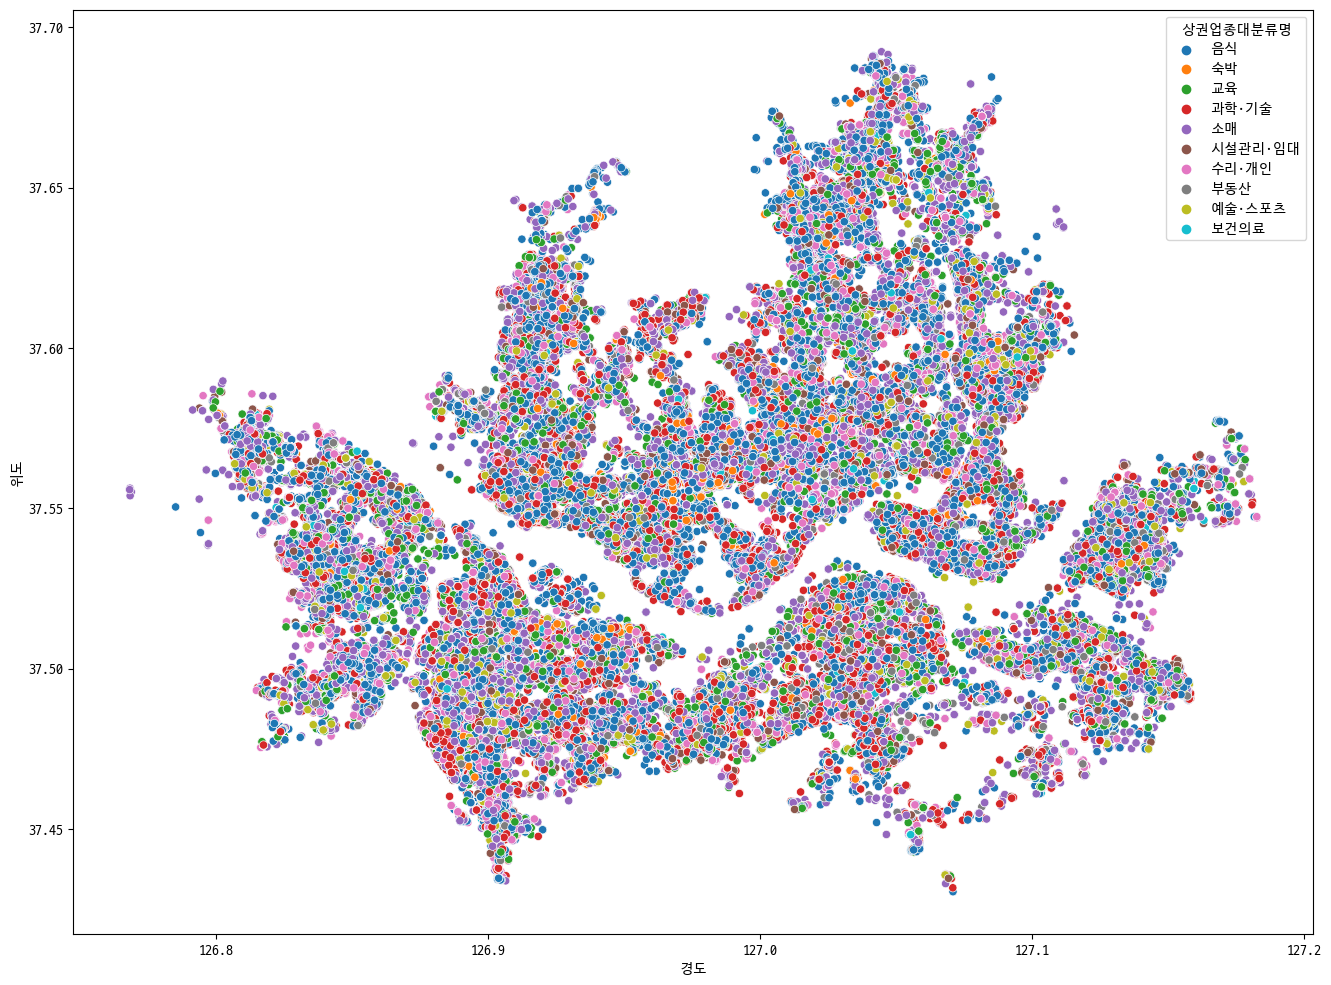

In [7]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col, x = '경도', y = '위도', hue='상권업종대분류명')
plt.show()

In [8]:
shop_col = shop_col[shop_col.상권업종대분류명 == '교육']
shop_col

,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
2,교육,기타 교육,태권도/무술학원,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 중계동 364-19,서울특별시 노원구 한글비석로 242,127.076956,37.649226
11,교육,기타 교육,기타 기술/직업 훈련학원,서울특별시,마포구,성산1동,성산동,서울특별시 마포구 성산동 214-20,서울특별시 마포구 월드컵로30다길 41,126.908665,37.562237
29,교육,기타 교육,레크리에이션 교육기관,서울특별시,은평구,응암3동,응암동,서울특별시 은평구 응암동 119-1,서울특별시 은평구 응암로 269,126.918749,37.596001
42,교육,기타 교육,요가/필라테스 학원,서울특별시,송파구,위례동,장지동,서울특별시 송파구 장지동 881,서울특별시 송파구 위례광장로 188,127.142381,37.481079
73,교육,기타 교육,기타 예술/스포츠 교육기관,서울특별시,서초구,양재1동,양재동,서울특별시 서초구 양재동 89-4,서울특별시 서초구 양재천로29길 3,127.042226,37.479264
...,...,...,...,...,...,...,...,...,...,...,...
489849,교육,교육 지원,교육컨설팅업,서울특별시,성동구,성수1가1동,성수동1가,서울특별시 성동구 성수동1가 656-462,서울특별시 성동구 왕십리로 66-10,127.044962,37.543207
489854,교육,기타 교육,직원 훈련기관,서울특별시,성동구,성수1가2동,성수동1가,서울특별시 성동구 성수동1가 13-214,서울특별시 성동구 상원12길 30,127.050669,37.550029
489863,교육,기타 교육,요가/필라테스 학원,서울특별시,송파구,잠실본동,잠실동,서울특별시 송파구 잠실동 183-12,서울특별시 송파구 백제고분로7길 41,127.083559,37.510985
489871,교육,일반 교육,입시·교과학원,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 중계동 366-14,서울특별시 노원구 중계로18길 13,127.077803,37.651296


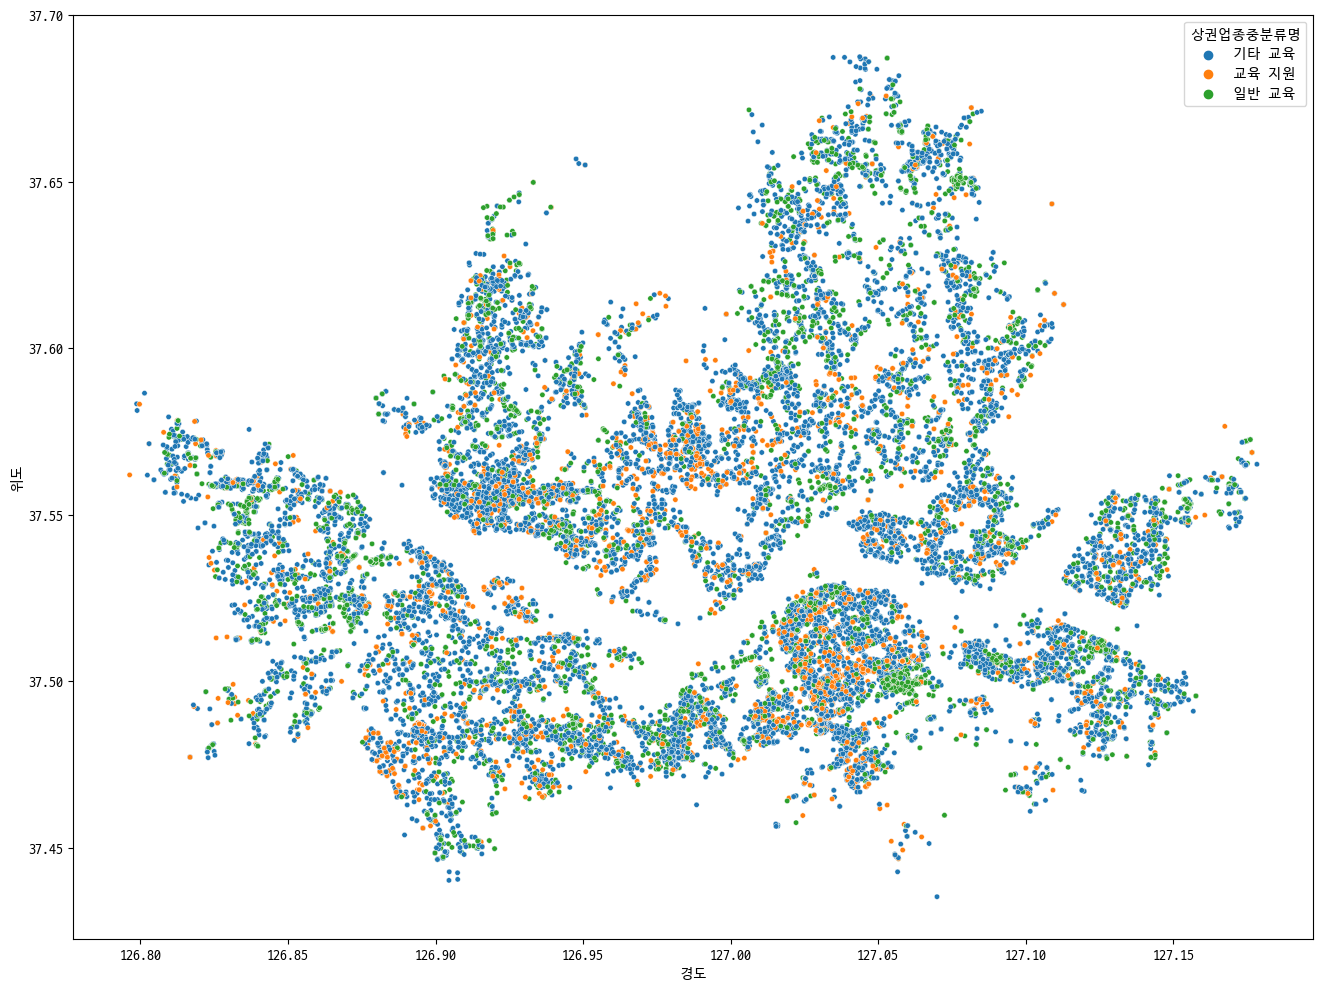

In [9]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col, x = '경도', y = '위도', hue='상권업종중분류명', s=15)
plt.show()

# 입시 학원

In [25]:
shop_col_edu = shop_col[shop_col.상권업종소분류명 == '입시·교과학원']
shop_col_edu

,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
135,교육,일반 교육,입시·교과학원,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 서초동 1542-5,서울특별시 서초구 서초대로42길 12,127.008519,37.491412
175,교육,일반 교육,입시·교과학원,서울특별시,서초구,내곡동,내곡동,서울특별시 서초구 내곡동 1-1969,서울특별시 서초구 샘마을2길 33,127.072451,37.459799
233,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치2동,대치동,서울특별시 강남구 대치동 977-16,서울특별시 강남구 삼성로64길 51,127.064442,37.501095
234,교육,일반 교육,입시·교과학원,서울특별시,구로구,개봉1동,개봉동,서울특별시 구로구 개봉동 476,서울특별시 구로구 경인로 382,126.863054,37.496382
236,교육,일반 교육,입시·교과학원,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 방이동 201-3,서울특별시 송파구 위례성대로16길 27,127.124084,37.510373
...,...,...,...,...,...,...,...,...,...,...,...
489672,교육,일반 교육,입시·교과학원,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 647-9,서울특별시 강남구 테헤란로 131,127.032924,37.500075
489704,교육,일반 교육,입시·교과학원,서울특별시,성북구,길음2동,길음동,서울특별시 성북구 길음동 1278,서울특별시 성북구 숭인로2길 61,127.024953,37.609343
489842,교육,일반 교육,입시·교과학원,서울특별시,서대문구,남가좌1동,남가좌동,서울특별시 서대문구 남가좌동 270-4,서울특별시 서대문구 수색로 48,126.913584,37.570391
489871,교육,일반 교육,입시·교과학원,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 중계동 366-14,서울특별시 노원구 중계로18길 13,127.077803,37.651296


In [26]:
# 모델링에 필요한 서울특별시, 시군구, 법정동명을 제외하고 칼럼을 삭제한다. 
shop_col_edu.drop(['상권업종대분류명', '상권업종중분류명', '행정동명', '지번주소', '도로명주소', '경도', '위도'], axis=1, inplace=True)
shop_col_edu

,상권업종소분류명,시도명,시군구명,법정동명
135,입시·교과학원,서울특별시,서초구,서초동
175,입시·교과학원,서울특별시,서초구,내곡동
233,입시·교과학원,서울특별시,강남구,대치동
234,입시·교과학원,서울특별시,구로구,개봉동
236,입시·교과학원,서울특별시,송파구,방이동
...,...,...,...,...
489672,입시·교과학원,서울특별시,강남구,역삼동
489704,입시·교과학원,서울특별시,성북구,길음동
489842,입시·교과학원,서울특별시,서대문구,남가좌동
489871,입시·교과학원,서울특별시,노원구,중계동


In [27]:
# '시군구명'과 '법정동명'을 기준으로 그룹화하고 '법정동'의 데이터 수를 카운트
grouped = shop_col_edu.groupby(['시군구명', '법정동명']).size().reset_index(name='학원 수')
grouped

,시군구명,법정동명,학원 수
0,강남구,개포동,44
1,강남구,논현동,39
2,강남구,대치동,701
3,강남구,도곡동,21
4,강남구,삼성동,39
...,...,...,...
302,중랑구,면목동,27
303,중랑구,묵동,20
304,중랑구,상봉동,11
305,중랑구,신내동,36


In [28]:
grouped.to_csv('./data/학원수.csv')
grouped

,시군구명,법정동명,학원 수
0,강남구,개포동,44
1,강남구,논현동,39
2,강남구,대치동,701
3,강남구,도곡동,21
4,강남구,삼성동,39
...,...,...,...
302,중랑구,면목동,27
303,중랑구,묵동,20
304,중랑구,상봉동,11
305,중랑구,신내동,36


In [33]:
# '강북구, '도봉구', '노원구' , '중랑구', '동대문구' 선택
selected_districts = ['강북구', '도봉구', '노원구', '성북구', '중랑구', '동대문구']
filtered_df = grouped[grouped['시군구명'].isin(selected_districts)]
filtered_df

,시군구명,법정동명,학원 수
23,강북구,미아동,67
24,강북구,번동,11
25,강북구,수유동,37
26,강북구,우이동,2
57,노원구,공릉동,25
58,노원구,상계동,100
59,노원구,월계동,18
60,노원구,중계동,194
61,노원구,하계동,17
62,도봉구,도봉동,5


In [34]:
filtered_df.to_csv('./data/동북부학원수.csv')
filtered_df

,시군구명,법정동명,학원 수
23,강북구,미아동,67
24,강북구,번동,11
25,강북구,수유동,37
26,강북구,우이동,2
57,노원구,공릉동,25
58,노원구,상계동,100
59,노원구,월계동,18
60,노원구,중계동,194
61,노원구,하계동,17
62,도봉구,도봉동,5


In [35]:
width = pd.read_csv('./data/법정동면적.csv')
width = width.drop(columns=['Unnamed: 0'], axis=1)
width

,법정동,면적
0,가락동,3430.0
1,가리봉동,400.0
2,가산동,2520.0
3,가양동,6200.0
4,가회동,540.0
...,...,...
210,효제동,600.0
211,효창동,440.0
212,후암동,860.0
213,휘경동,1680.0


In [46]:
width_academy
width_academy = width_academy.rename(columns={'시군구명': '시군구', '법정동명': '법정동'})
width_academy

,시군구,법정동,학원 수
0,강북구,미아동,67
1,강북구,번동,11
2,강북구,수유동,37
3,강북구,우이동,2
4,노원구,공릉동,25
5,노원구,상계동,100
6,노원구,월계동,18
7,노원구,중계동,194
8,노원구,하계동,17
9,도봉구,도봉동,5


In [47]:
width_academy.to_csv('./data/동북부학원수.csv')
width_academy

,시군구,법정동,학원 수
0,강북구,미아동,67
1,강북구,번동,11
2,강북구,수유동,37
3,강북구,우이동,2
4,노원구,공릉동,25
5,노원구,상계동,100
6,노원구,월계동,18
7,노원구,중계동,194
8,노원구,하계동,17
9,도봉구,도봉동,5


In [85]:
width = pd.read_csv('./data/동북부면적.csv')
width = width.drop(columns=['Unnamed: 0'], axis=1)
width

,시군구,법정동,면적
0,강북구,미아동,4370.0
1,강북구,번동,2710.0
2,강북구,수유동,6240.0
3,강북구,우이동,10280.0
4,노원구,공릉동,8230.0
5,노원구,상계동,15680.0
6,노원구,월계동,4270.0
7,노원구,중계동,5200.0
8,노원구,하계동,2060.0
9,도봉구,도봉동,9550.0


In [86]:
# 조인
merged_df = pd.merge(width_academy, width, on=['시군구', '법정동'], how='inner')
merged_df

,시군구,법정동,학원 수,면적
0,강북구,미아동,67,4370.0
1,강북구,번동,11,2710.0
2,강북구,수유동,37,6240.0
3,강북구,우이동,2,10280.0
4,노원구,공릉동,25,8230.0
5,노원구,상계동,100,15680.0
6,노원구,월계동,18,4270.0
7,노원구,중계동,194,5200.0
8,노원구,하계동,17,2060.0
9,도봉구,도봉동,5,9550.0


In [87]:
merged_df['면적'] = merged_df['면적']  / 1000
merged_df

,시군구,법정동,학원 수,면적
0,강북구,미아동,67,4.37
1,강북구,번동,11,2.71
2,강북구,수유동,37,6.24
3,강북구,우이동,2,10.28
4,노원구,공릉동,25,8.23
5,노원구,상계동,100,15.68
6,노원구,월계동,18,4.27
7,노원구,중계동,194,5.20
8,노원구,하계동,17,2.06
9,도봉구,도봉동,5,9.55


In [88]:
merged_df['면적(㎢)당 학원 수'] = merged_df['학원 수']  / merged_df['면적']
merged_df

,시군구,법정동,학원 수,면적,면적(㎢)당 학원 수
0,강북구,미아동,67,4.37,15.331808
1,강북구,번동,11,2.71,4.059041
2,강북구,수유동,37,6.24,5.929487
3,강북구,우이동,2,10.28,0.194553
4,노원구,공릉동,25,8.23,3.037667
5,노원구,상계동,100,15.68,6.377551
6,노원구,월계동,18,4.27,4.215457
7,노원구,중계동,194,5.20,37.307692
8,노원구,하계동,17,2.06,8.252427
9,도봉구,도봉동,5,9.55,0.523560


In [89]:
merged_df.drop(columns=['학원 수', '면적'], inplace=True)
merged_df

,시군구,법정동,면적(㎢)당 학원 수
0,강북구,미아동,15.331808
1,강북구,번동,4.059041
2,강북구,수유동,5.929487
3,강북구,우이동,0.194553
4,노원구,공릉동,3.037667
5,노원구,상계동,6.377551
6,노원구,월계동,4.215457
7,노원구,중계동,37.307692
8,노원구,하계동,8.252427
9,도봉구,도봉동,0.523560


In [90]:
merged_df.to_csv('./data/동북부학원수.csv')
merged_df

,시군구,법정동,면적(㎢)당 학원 수
0,강북구,미아동,15.331808
1,강북구,번동,4.059041
2,강북구,수유동,5.929487
3,강북구,우이동,0.194553
4,노원구,공릉동,3.037667
5,노원구,상계동,6.377551
6,노원구,월계동,4.215457
7,노원구,중계동,37.307692
8,노원구,하계동,8.252427
9,도봉구,도봉동,0.523560
